In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm

from scipy import stats


from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

In [2]:
dataframe = pd.read_csv('LifeExpectancy.csv', index_col = [0])

In [3]:
dataframe.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
dataframe.tail()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [5]:
dataframe.shape

(2938, 22)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

### Preprocessing :

Preprocessing is the steps taken to clean, organize, and transform raw data into a format suitable for analysis or machine learning models. It is a crucial step in the machine learning pipelines, as the quality of the input data directly impacts the performance of the models.

In [7]:
dataframe.isna().sum().sort_values(ascending = False)

population                         652
hepatitis_b                        553
gdp                                448
total_expenditure                  226
alcohol                            194
income_composition_of_resources    167
schooling                          163
thinness_5_9_years                  34
thinness__1_19_years                34
bmi                                 34
polio                               19
diphtheria                          19
life_expectancy                     10
adult_mortality                     10
hiv_aids                             0
country                              0
year                                 0
measles                              0
percentage_expenditure               0
infant_deaths                        0
status                               0
under_five_deaths                    0
dtype: int64

In [8]:
categorical_columns = list(dataframe.dtypes[dataframe.dtypes == 'O'].index.values)

for column in categorical_columns:
  dataframe[column] = dataframe[column].astype('category')

In [9]:
X = dataframe.loc[:,dataframe.columns != 'life_expectancy']
y = dataframe['life_expectancy']

In [10]:
X.head()

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: life_expectancy, dtype: float64

In [12]:
X.shape, y.shape

((2938, 21), (2938,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1968, 21), (970, 21), (1968,), (970,))



1. **Data Cleaning:**
   - Handling missing data: Imputing missing values or removing rows/columns with missing data.
   - Removing duplicates: Identifying and removing identical rows from the dataset.

    - Exploratory data analysis (EDA) through visualization to understand the distribution and relationships within the dataset.





2. **Data Splitting:**
   - Splitting the dataset into training and testing sets for model evaluation.
   - In some cases, creating validation sets for hyperparameter tuning during model training.



In [14]:

def cleaning_dataframe(X,y):
  print('Original Size:{}'.format(X.shape))
  categorical_columns = X.dtypes[X.dtypes == 'category'].index.values
  X = X.drop(columns=categorical_columns)                             # removing categorical columns
  print('Removed: {}'.format(categorical_columns))
  X = X.dropna()                                                      # dropping missing values
  y = y[X.index]  
  print('New Size: {}'.format(X.shape))
  return X,y


In [15]:
X_train, y_train = cleaning_dataframe(X_train,y_train)
X_test, y_test = cleaning_dataframe(X_test,y_test)

Original Size:(1968, 21)
Removed: ['country' 'status']
New Size: (1123, 19)
Original Size:(970, 21)
Removed: ['country' 'status']
New Size: (526, 19)


In [16]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_train)

In [17]:
weights = lr.coef_
intercept = lr.intercept_

print('Coefficients: \n',weights[:25])
print('Interceptor: \n',intercept)

Coefficients: 
 [-1.38838510e-01 -1.64718849e-02  9.84951481e-02 -1.15513163e-01
  3.10980998e-04 -3.96311344e-03 -1.99845930e-05  2.64062644e-02
 -7.16892511e-02  1.37560599e-03  5.94793691e-02  1.43708169e-02
 -4.45589904e-01  2.71832061e-05 -3.21306071e-09 -1.27162215e-02
 -8.30559860e-02  1.06725695e+01  9.51863608e-01]
Interceptor: 
 331.8056386862111


### Statmodel Linear Regression :

In [18]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     281.4
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:07:59   Log-Likelihood:                -3054.1
No. Observations:                1123   AIC:                             6148.
Df Residuals:                    1103   BIC:                             6249.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             331.8056     58.609      5.661      0.000     216.808     446.803
year                               -0.1388      0.029     -4.744      0.000      -0.196      -0.081
adult_mortality                    -0.0165      0.001    -13.942      0.000      -0.019      -0.014
infant_deaths                       0.0985      0.014      6.915      0.000       0.071       0.126
alcohol                            -0.1155      0.040     -2.916      0.004      -0.193      -0.038
percentage_expenditure              0.0003      0.000      1.113      0.266      -0.000       0.001
hepatitis_b                        -0.0040      0.006     -0.700      0.484      -0.015       0.007
measles                         -1.998e-05   1.49e-05     -1.344      0.179   -4.92e-05    9.18e-06
bmi                                 0.0264      0.008      3.466      0.001       0.011       0.041
under_five_deaths                  -0.0717      0.010     -7.065      0.000      -0.092      -0.052
polio                               0.0014      0.006      0.214      0.831      -0.011       0.014
total_expenditure                   0.0595      0.050      1.178      0.239      -0.040       0.159
diphtheria                          0.0144      0.007      1.933      0.054      -0.000       0.029
hiv_aids                           -0.4456      0.022    -20.234      0.000      -0.489      -0.402
gdp                              2.718e-05   4.47e-05      0.609      0.543   -6.04e-05       0.000
population                      -3.213e-09    2.7e-09     -1.191      0.234   -8.51e-09    2.08e-09
thinness__1_19_years               -0.0127      0.065     -0.196      0.844      -0.140       0.114
thinness_5_9_years                 -0.0831      0.064     -1.290      0.197      -0.209       0.043
income_composition_of_resources    10.6726      1.025     10.413      0.000       8.662      12.684
schooling                           0.9519      0.075     12.707      0.000       0.805       1.099
==============================================================================
Omnibus:                       24.164   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.518
Skew:                          -0.113   Prob(JB):                     2.15e-10
Kurtosis:                       3.949   Cond. No.                     3.02e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Analysis :

<AxesSubplot: ylabel='Density'>

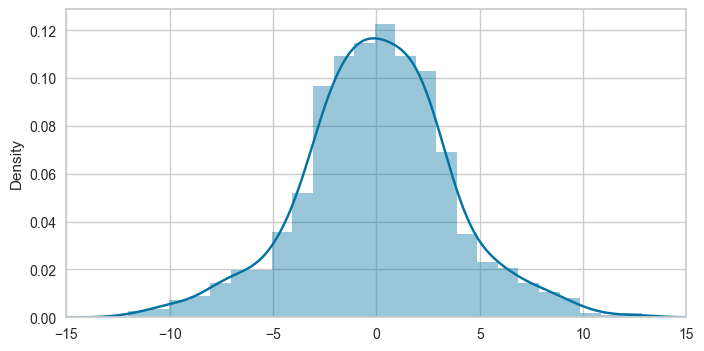

In [19]:
fig, ax = plt.subplots(figsize = (8,4))
ax.set_xlim([-15,15])
sns.distplot(result.resid,bins = 30)

### Probability Plot :

((array([-3.23088511, -2.96820298, -2.82177751, ...,  2.82177751,
          2.96820298,  3.23088511]),
  array([-16.98607418, -12.01105412, -11.33471521, ...,  11.07616836,
          12.36369399,  12.83749939])),
 (3.661620578579334, 3.790274283706834e-10, 0.9947688098690376))

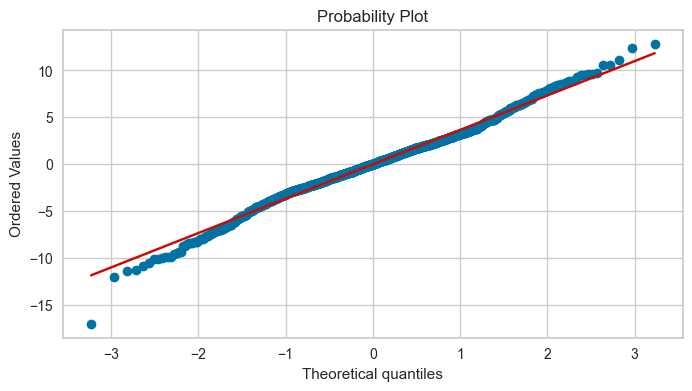

In [20]:
fig, ax = plt.subplots(figsize = (8,4))
stats.probplot(result.resid,plot = plt)

### Q-Q Plot :

The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution. A q-q plot is a plot of the quantiles of the first dataset against the quantiles of the second dataset.

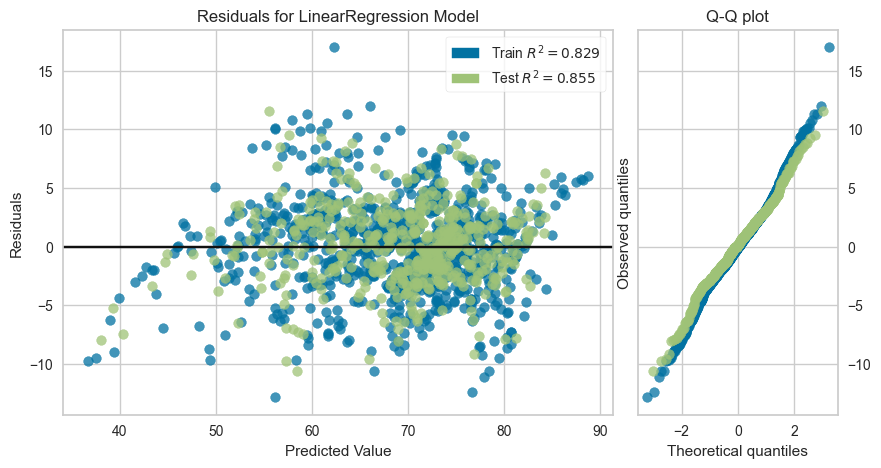

In [21]:
plt.figure(figsize=(10, 5));
viz = residuals_plot(lr, 
                     X_train, 
                     y_train, 
                     X_test, 
                     y_test, 
                     is_fitted = True, qqplot = True, hist = False)

### Visualizing Prediction W.R.T Actual Values 

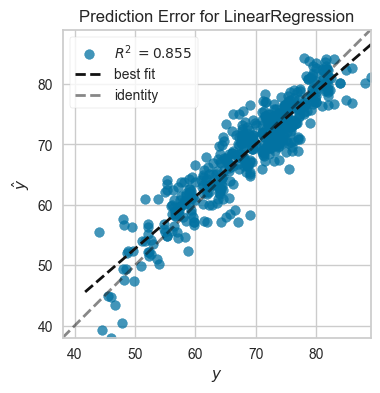

In [22]:
plt.figure(figsize = (8,4))
visualizer = prediction_error(lr, 
                              X_test, 
                              y_test, 
                              is_fitted = True)

In [23]:
from sklearn.metrics import mean_squared_error
N = X_train.shape[0]

prediction = result.predict(sm.add_constant(X_train))
mean_square_error = np.sum((y_train-prediction)**2)/N

mean_square_error_sk = mean_squared_error(y_train,prediction)

mean_square_error, mean_square_error_sk


(13.480918067442284, 13.480918067442284)

In [24]:
norm_mse = np.sum((y_train - prediction)**2)/((N)*np.var(y_train))
norm_mse

0.17104150205288332

In [26]:
R_squared_sk = r2_score(y_train,prediction)
R_squared_sk

0.8289584979471166